In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/home/sahibachopra/miniconda/envs/ai/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Import the credit risk dataset

In [3]:
import os
os.chdir('/home/sahibachopra/packt/')

In [4]:
data = pd.read_csv('german_credit.csv')

## let's take a look at the type of data that we have
 - 21 parameters: 20 variables and 1 parameter telling us whether the person is 'good' or 'bad' in terms of risk
 - 1000 observations
 - all numeric data

In [11]:
data.shape

(1000, 21)

## checking the variable type is important because we want to make sure that all our variables are numeric

In [12]:
data.dtypes

Creditability                        int64
Account Balance                      int64
Duration of Credit (month)           int64
Payment Status of Previous Credit    int64
Purpose                              int64
Credit Amount                        int64
Value Savings/Stocks                 int64
Length of current employment         int64
Instalment per cent                  int64
Sex & Marital Status                 int64
Guarantors                           int64
Duration in Current address          int64
Most valuable available asset        int64
Age (years)                          int64
Concurrent Credits                   int64
Type of apartment                    int64
No of Credits at this Bank           int64
Occupation                           int64
No of dependents                     int64
Telephone                            int64
Foreign Worker                       int64
dtype: object

## let's look at the data
- there are 700 creditable people and 300 un-creditable people
- unbalanced dataset

In [23]:
data.groupby('Creditability').size()

Creditability
0    300
1    700
dtype: int64

## very few of the creditable applicants have an account balance greater than 200 DM

In [15]:
# 1 - no debit account
# 2 - no balance or debit
# 3 - < 200 DM
# 4 - >= 200 DM
data.groupby(['Creditability', 'Account Balance']).size().groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

Creditability  Account Balance
0              1                  45.000000
               2                  35.000000
               3                   4.666667
               4                  15.333333
1              1                  19.857143
               2                  23.428571
               3                   7.000000
               4                  49.714286
dtype: float64

## higher proportion of hesitant payments and problematic running accounts among uncreditable applicants compared to creditable applicants

In [14]:
# 0 - hesitant payment of previous credits
# 1 - problematic running account / there are further credits running but at other banks
# 2 - no previous credits / paid back all previous credits
# 3 - no problems with current credits at this bank
# 4 - paid back previous credits at this bank

data.groupby(['Creditability', 'Payment Status of Previous Credit']).size().groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

Creditability  Payment Status of Previous Credit
0              0                                     8.333333
               1                                     9.333333
               2                                    56.333333
               3                                     9.333333
               4                                    16.666667
1              0                                     2.142857
               1                                     3.000000
               2                                    51.571429
               3                                     8.571429
               4                                    34.714286
dtype: float64

## plot the continuous data

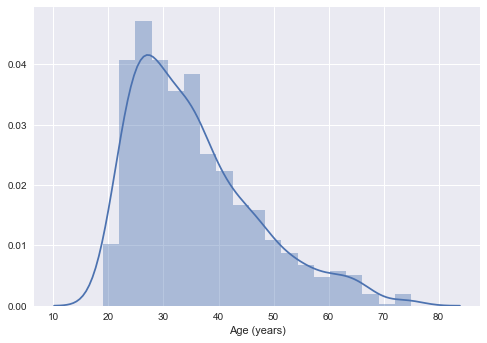

In [37]:
sns.distplot(data['Age (years)'])
plt.show()

/home/sahibachopra/miniconda/envs/ai/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


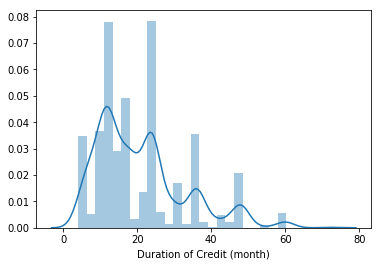

In [5]:
sns.distplot(data['Duration of Credit (month)'])
plt.show()

/home/sahibachopra/miniconda/envs/ai/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


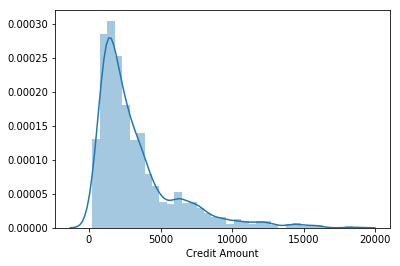

In [6]:
sns.distplot(data['Credit Amount'])
plt.show()
